In [ ]:
# Point to get across
# What is K-Means
# K Cluster Selection - Elbow Method
# K-Means Use case
# Show how the algo works --> Show how to scale features

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataFrame = pd.read_csv('../data/price_zone.csv')
priceZone = dataFrame.copy()

In [4]:
priceZone.head()

,store,avg_weekly_sales,price_elasticity,median_household_income,avg_weekly_txn,avg_unit_retail
0,s1001,12293,-3.25,113848,585.380952,8.74
1,s1002,24606,-2.04,67687,984.240000,14.75
2,s1003,66042,-3.68,110448,7338.000000,11.55
3,s1004,64912,-2.48,39508,2704.666667,5.49
4,s1005,152239,-1.39,73039,15223.900000,8.93


In [5]:
priceZone.describe()

,avg_weekly_sales,price_elasticity,median_household_income,avg_weekly_txn,avg_unit_retail
count,999.000000,999.000000,999.000000,999.000000,999.000000
mean,104166.528529,-2.623994,87370.028028,8365.742307,8.921802
std,55788.861500,0.799776,35578.135917,6702.604205,3.520830
min,10290.000000,-4.000000,25110.000000,414.720000,3.000000
25%,54387.500000,-3.300000,56908.500000,3668.365080,5.710000
50%,104843.000000,-2.620000,85138.000000,6782.380952,8.990000
75%,152671.500000,-1.960000,117500.000000,10651.753470,11.985000
max,199970.000000,-1.210000,149965.000000,39291.200000,14.990000


In [17]:
# this retail chain can only manage up to 20 price zones

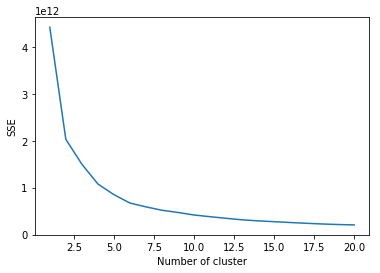

In [6]:
# Explain SSE
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(priceZone.drop(columns=['store']))
    priceZone["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [8]:
print(sse)
# for k in range(1,11):
#     print(str(k) + ': ' + str(sse[k] - sse[k+1]))

{1: 4414279487443.367, 2: 2029088130470.8276, 3: 1500089091227.231, 4: 1079279655532.9602, 5: 851770528819.5244, 6: 672803578375.2146, 7: 591222441543.2102, 8: 519524600838.3525, 9: 471916151431.2805, 10: 418009261774.63715, 11: 381907685428.82275, 12: 347710937857.207, 13: 315326920276.8724, 14: 293457402686.09375, 15: 275695271775.2041, 16: 258139433506.79526, 17: 241754479531.42725, 18: 226859745364.55017, 19: 215128724307.12683, 20: 206854904401.7852}


In [9]:
kmeans = KMeans(n_clusters=14, max_iter=2000).fit(priceZone.drop(columns=['store']))
priceZone["clusters"] = kmeans.labels_
priceZone.groupby(by=['clusters']).mean()

,avg_weekly_sales,price_elasticity,median_household_income,avg_weekly_txn,avg_unit_retail
clusters,,,,,
0,32462.000000,-2.678673,83273.142857,2518.111944,9.471531
1,106474.434783,-2.518986,128230.405797,8138.922993,8.649565
2,151085.290323,-2.499194,49879.419355,11686.975962,9.490645
3,174565.320988,-2.611852,93564.407407,13946.201726,9.152346
4,24877.538462,-2.616308,127784.630769,1889.419796,9.497538
5,115143.661972,-2.615070,45057.943662,8598.427544,7.822394
6,74521.052632,-2.604079,90202.894737,6346.711330,8.759211
7,62773.666667,-2.765072,129998.623188,5119.046353,8.681159
8,185169.268657,-2.692090,51967.910448,14959.892181,8.580299


In [88]:
# radar plot

## Scale the data

In [10]:
priceZone_normalized = dataFrame.copy()

priceZone_normalized_store = priceZone_normalized['store']
priceZone_normalized.drop(columns=['store'], inplace=True)

priceZone_normalized = (priceZone_normalized - priceZone_normalized.mean())/priceZone_normalized.std()

priceZone_normalized['store'] = priceZone_normalized_store
priceZone_normalized.head()

,avg_weekly_sales,price_elasticity,median_household_income,avg_weekly_txn,avg_unit_retail,store
0,-1.646808,-0.782727,0.744220,-1.160797,-0.051636,s1001
1,-1.426101,0.730197,-0.553234,-1.101289,1.655348,s1002
2,-0.683372,-1.320377,0.648656,-0.153335,0.746471,s1003
3,-0.703627,0.180043,-1.345265,-0.844608,-0.974714,s1004
4,0.861686,1.542925,-0.402804,1.023208,0.002328,s1005


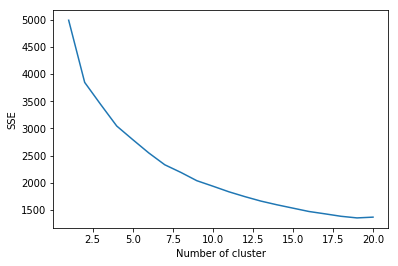

In [11]:
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(priceZone_normalized.drop(columns=['store']))
    priceZone_normalized["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [12]:
print(sse)

{1: 4989.999999999996, 2: 3845.648065007295, 3: 3438.9034506459902, 4: 3042.8535313759116, 5: 2792.4051122991186, 6: 2547.377588095387, 7: 2329.290831321385, 8: 2189.3926929733802, 9: 2036.1585871787797, 10: 1935.5938281978383, 11: 1832.0622041627887, 12: 1742.8431671387964, 13: 1660.7961503981437, 14: 1592.8287429204927, 15: 1531.0721542243878, 16: 1469.2963653417605, 17: 1426.1977050114183, 18: 1381.0710245757673, 19: 1351.0733438702866, 20: 1365.2876849794466}


In [15]:
kmeans = KMeans(n_clusters=14, max_iter=2000).fit(priceZone_normalized.drop(columns=['store']))
priceZone_normalized["clusters"] = kmeans.labels_
priceZone_normalized.groupby(by=['clusters']).mean()

,avg_weekly_sales,price_elasticity,median_household_income,avg_weekly_txn,avg_unit_retail
clusters,,,,,
0,0.598825,0.633699,-0.898757,0.100502,-0.735566
1,-0.610761,0.813206,-0.141705,-0.506886,-1.037278
2,0.959760,0.753352,1.021680,0.295708,0.386076
3,0.858579,-1.142066,0.810450,0.431307,0.950969
4,0.829446,-0.747178,1.005789,0.266319,-0.584432
5,-0.819300,-0.964989,0.865794,-0.579449,0.996358
6,1.217117,0.134074,0.415393,3.252053,-0.523951
7,-0.828795,0.973930,-0.507281,-0.621552,0.841522
8,-0.948447,0.782843,1.031856,-0.678724,0.874481


In [16]:
# priceZone.drop(columns=['clusters'], inplace=True)
priceZone = pd.merge(priceZone, priceZone_normalized[["store", "clusters"]], on=['store'])
priceZone.head()

,store,avg_weekly_sales,price_elasticity,median_household_income,avg_weekly_txn,avg_unit_retail,clusters_x,clusters_y,clusters
0,s1001,12293,-3.25,113848,585.380952,8.74,4,6,9
1,s1002,24606,-2.04,67687,984.240000,14.75,0,0,7
2,s1003,66042,-3.68,110448,7338.000000,11.55,7,11,5
3,s1004,64912,-2.48,39508,2704.666667,5.49,12,10,1
4,s1005,152239,-1.39,73039,15223.900000,8.93,2,5,11


In [17]:
priceZone.groupby(by=['clusters']).mean()

,avg_weekly_sales,price_elasticity,median_household_income,avg_weekly_txn,avg_unit_retail,clusters_x,clusters_y
clusters,,,,,,,
0,137574.317647,-2.117176,55393.929412,9039.369471,6.332000,6.105882,0.505882
1,70092.861111,-1.973611,82328.444444,4968.288238,5.269722,6.712963,9.518519
2,157710.469136,-2.021481,123719.481481,10347.753897,10.281111,8.185185,1.506173
3,152065.695652,-3.537391,116204.326087,11256.621806,12.270000,7.521739,7.000000
4,150440.372549,-3.221569,123154.117647,10150.775053,6.864118,7.627451,3.019608
5,58458.711538,-3.395769,118173.365385,4481.923587,12.429808,4.788462,11.000000
6,172068.117647,-2.516765,102148.941176,30162.966900,7.077059,8.676471,13.000000
7,57929.000000,-1.845068,69321.917808,4199.728407,11.884658,5.684932,0.000000
8,51253.771930,-1.997895,124081.526316,3816.522441,12.000702,4.561404,8.000000


In [ ]:
# maybe add radar graph??

In [20]:
# Export Preped Data to file
priceZone.to_csv('../data/store_cluster.csv', index=False)